In [1]:
## Kernel Density Estimation

##part 2 : pdf estimation using kde

import numpy as np
from matplotlib import pyplot

In [2]:
seed = 2
rand = np.random.RandomState(seed)
x1 = rand.normal(0,1,1000)
x2 = rand.normal(5,1,1000)
x = np.append(x1,x2)

In [3]:
### fitting a kde

from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1, kernel='gaussian')
kde.fit(x[:, None])
print(kde)

KernelDensity(algorithm='auto', atol=0, bandwidth=1, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)


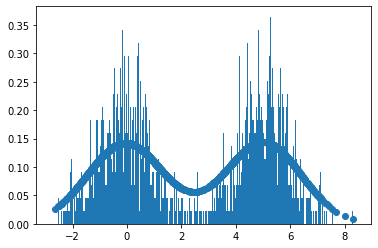

In [5]:
#plotting pdf estimated by kde
logprob = kde.score_samples(x[:, None])
pyplot.hist(x,bins=500,density=True)
pyplot.scatter(x,np.exp(logprob))

In [6]:
#finding best params for bandwidth using gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None])
best_estimator = grid.best_estimator_
print(best_estimator)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.2104904144512021,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


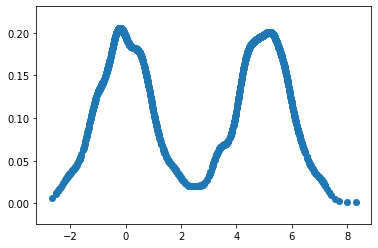

In [7]:
#Lets plot pdf with the best estimator

log_prob = best_estimator.score_samples(x[:,None])
pyplot.hist(x,bins=500,density=True)
pyplot.scatter(x,np.exp(log_prob))